In [25]:
import xarray as xr
import proplot as pplt
import pandas as pd
import numpy as np
from pathlib import Path

from AOSCMcoupling.files import OIFSPreprocessor, NEMOPreprocessor

In [26]:
start_date = pd.Timestamp("2014-07-01")
oifs_preprocessor = OIFSPreprocessor(
    start_date, np.timedelta64(-7, "h")
)
nemo_preprocessor = NEMOPreprocessor(
    start_date, np.timedelta64(-7, "h")
)

In [27]:
plotting_output_dir = Path("plots/mass_flux_off_43")
plotting_output_dir.mkdir(exist_ok=True)

In [28]:
ece3_dir = Path("PAPA")

In [29]:
def load_datasets(output_dir, exp_ids):
    oifs_progvar = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/progvar.nc", preprocess=oifs_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    oifs_diagvar = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/diagvar.nc", preprocess=oifs_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_t_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_T*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_u_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_U*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_v_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_V*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    return oifs_progvar, oifs_diagvar, nemo_t_grids, nemo_u_grids, nemo_v_grids

In [30]:
exp_ids = ["MF30", "MF31", "MF32", "MF3S_30"]
oifs_progvar_3, oifs_diagvar_3, nemo_t_grids_3, nemo_u_grids_3, nemo_v_grids_3 = load_datasets(Path("PAPA"), exp_ids)

## Boundary Layer Height

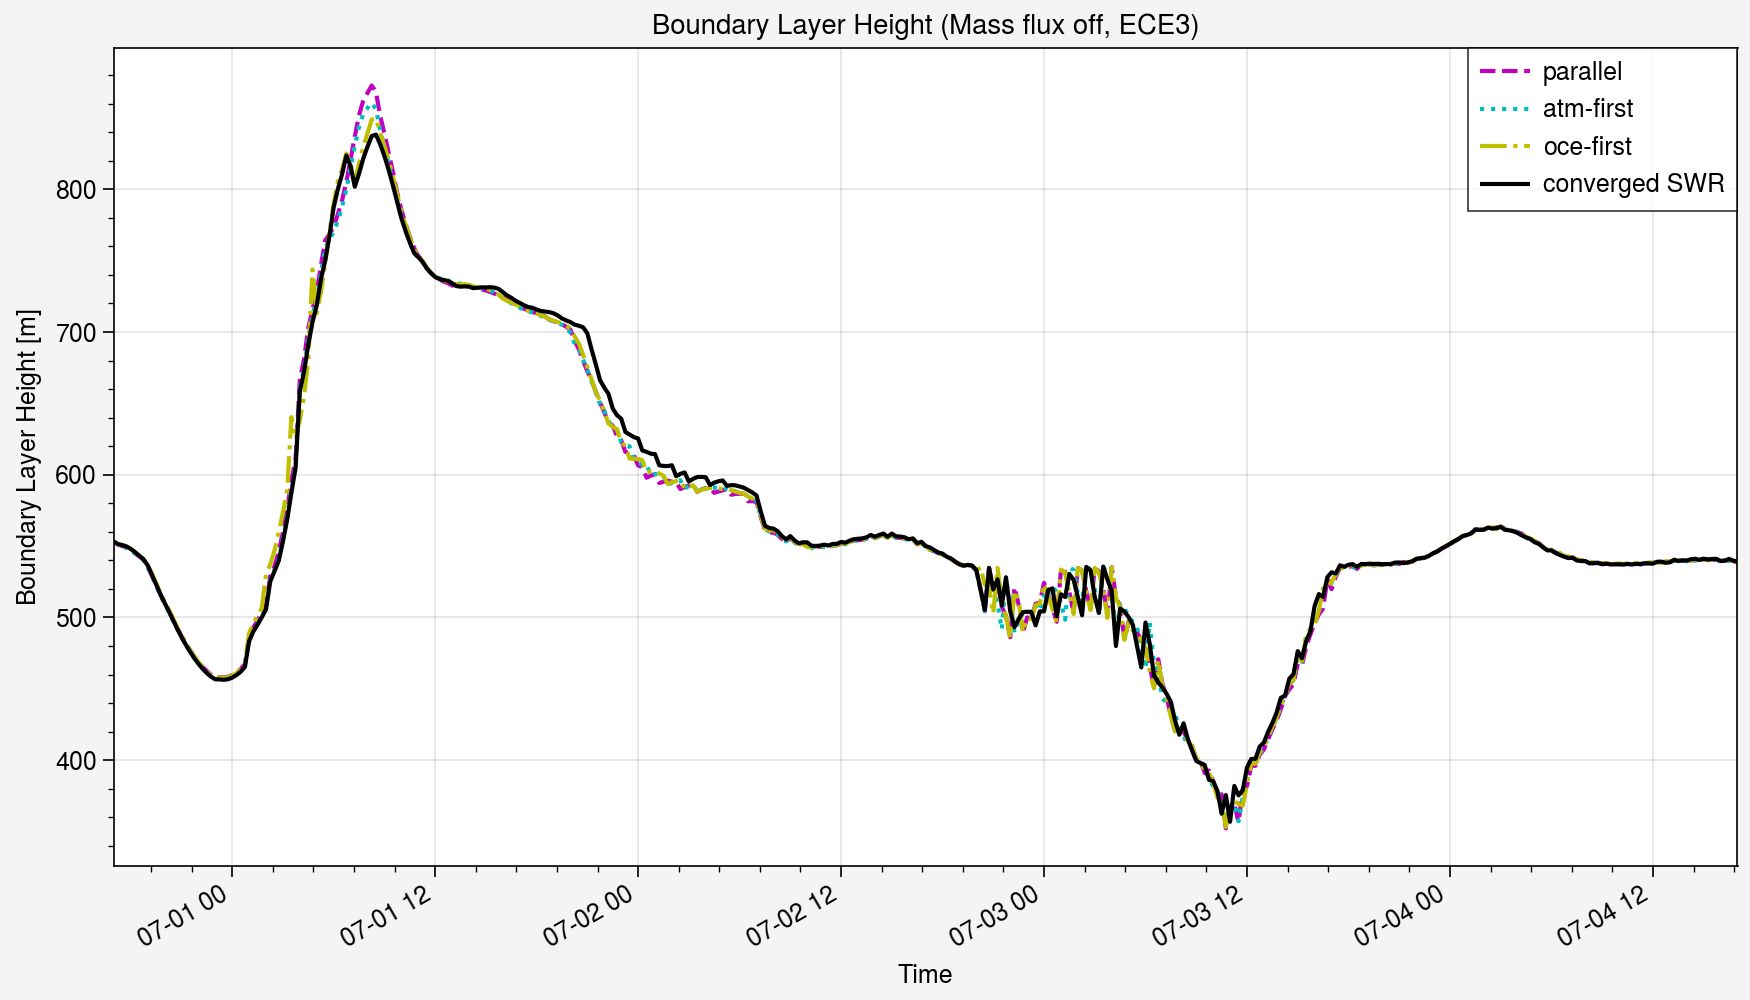

In [31]:
colors = ["m", "c", "y", "k"]
labels = ["parallel", "atm-first", "oce-first", "converged SWR"]
alpha = 1
linestyles = ["--", ":", "-.", "-"]

fig, ax = pplt.subplots(width="70em", height="40em")

for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.pbl_height,
        color=color,
        label=label,
        alpha=alpha,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Boundary Layer Height $[m]$",
    xlabel="Time",
    title="Boundary Layer Height (Mass flux off, ECE3)",
    xrotation=30,
)
ax.legend(ncols=1)
fig.savefig(plotting_output_dir / "ece3_pbl_height.pdf")

## Boundary Layer Type

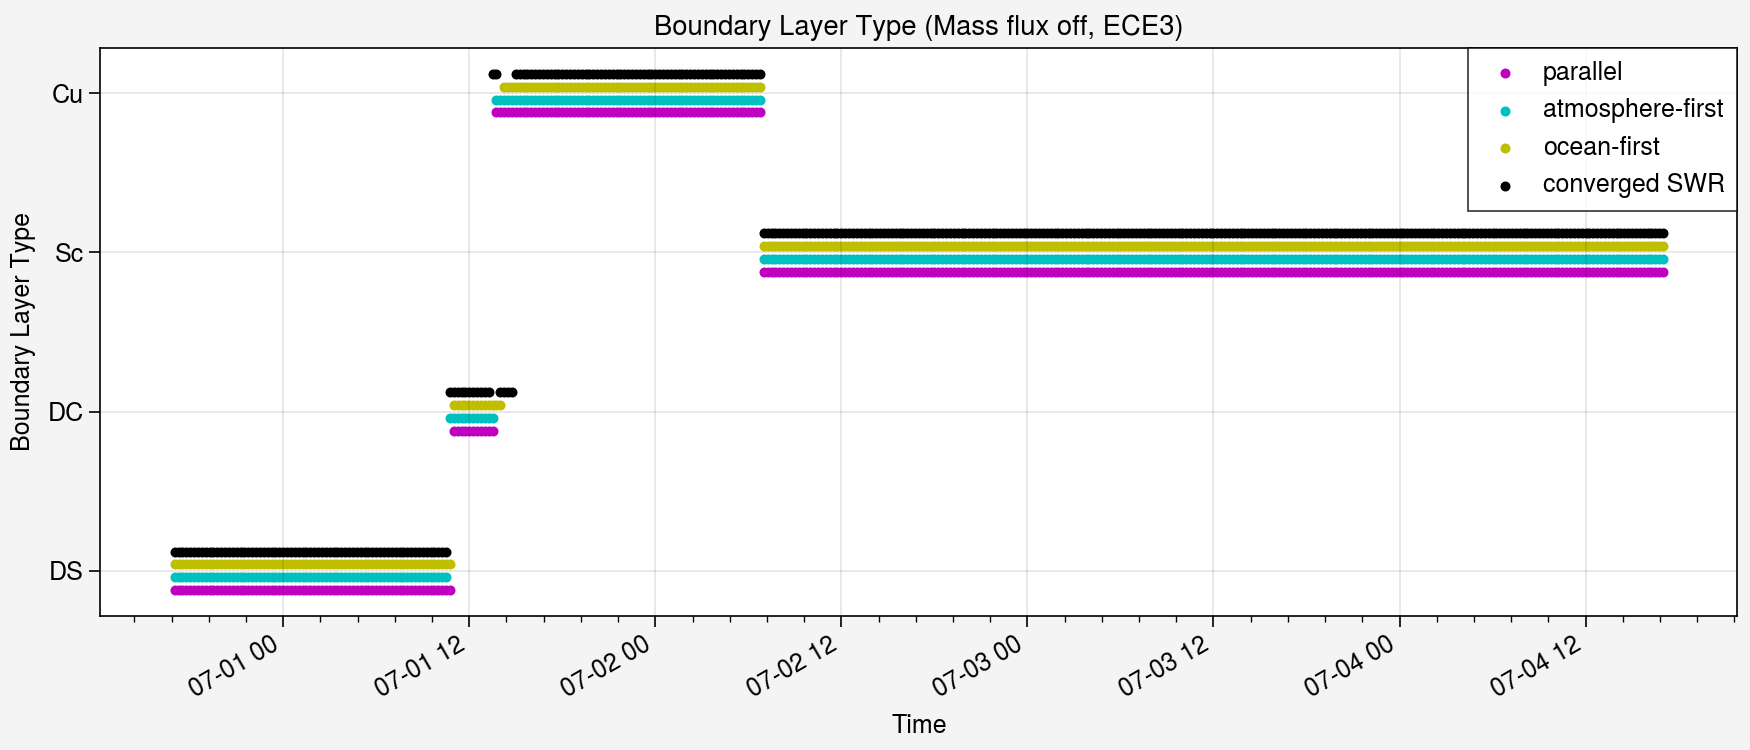

In [32]:
fig, ax = pplt.subplots(width="70em", height="30em")

colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
shifts = [-0.12, -0.04, 0.04, 0.12]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    shift = shifts[i]
    ax.scatter(
        oifs_diagvar.pbl_type + shift,
        color=color,
        label=label,
        marker=".",
    )
ax.format(
    title="Boundary Layer Type (Mass flux off, ECE3)",
    ylabel="Boundary Layer Type",
    yticks=[0, 1, 2, 3],
    yticklabels=["DS", "DC", "Sc", "Cu"],
    ytickminor=False,
    xrotation=30,
    xlabel="Time",
)
ax.legend(ncol=1)

fig.savefig(plotting_output_dir / "ece3_pbl_types.pdf")

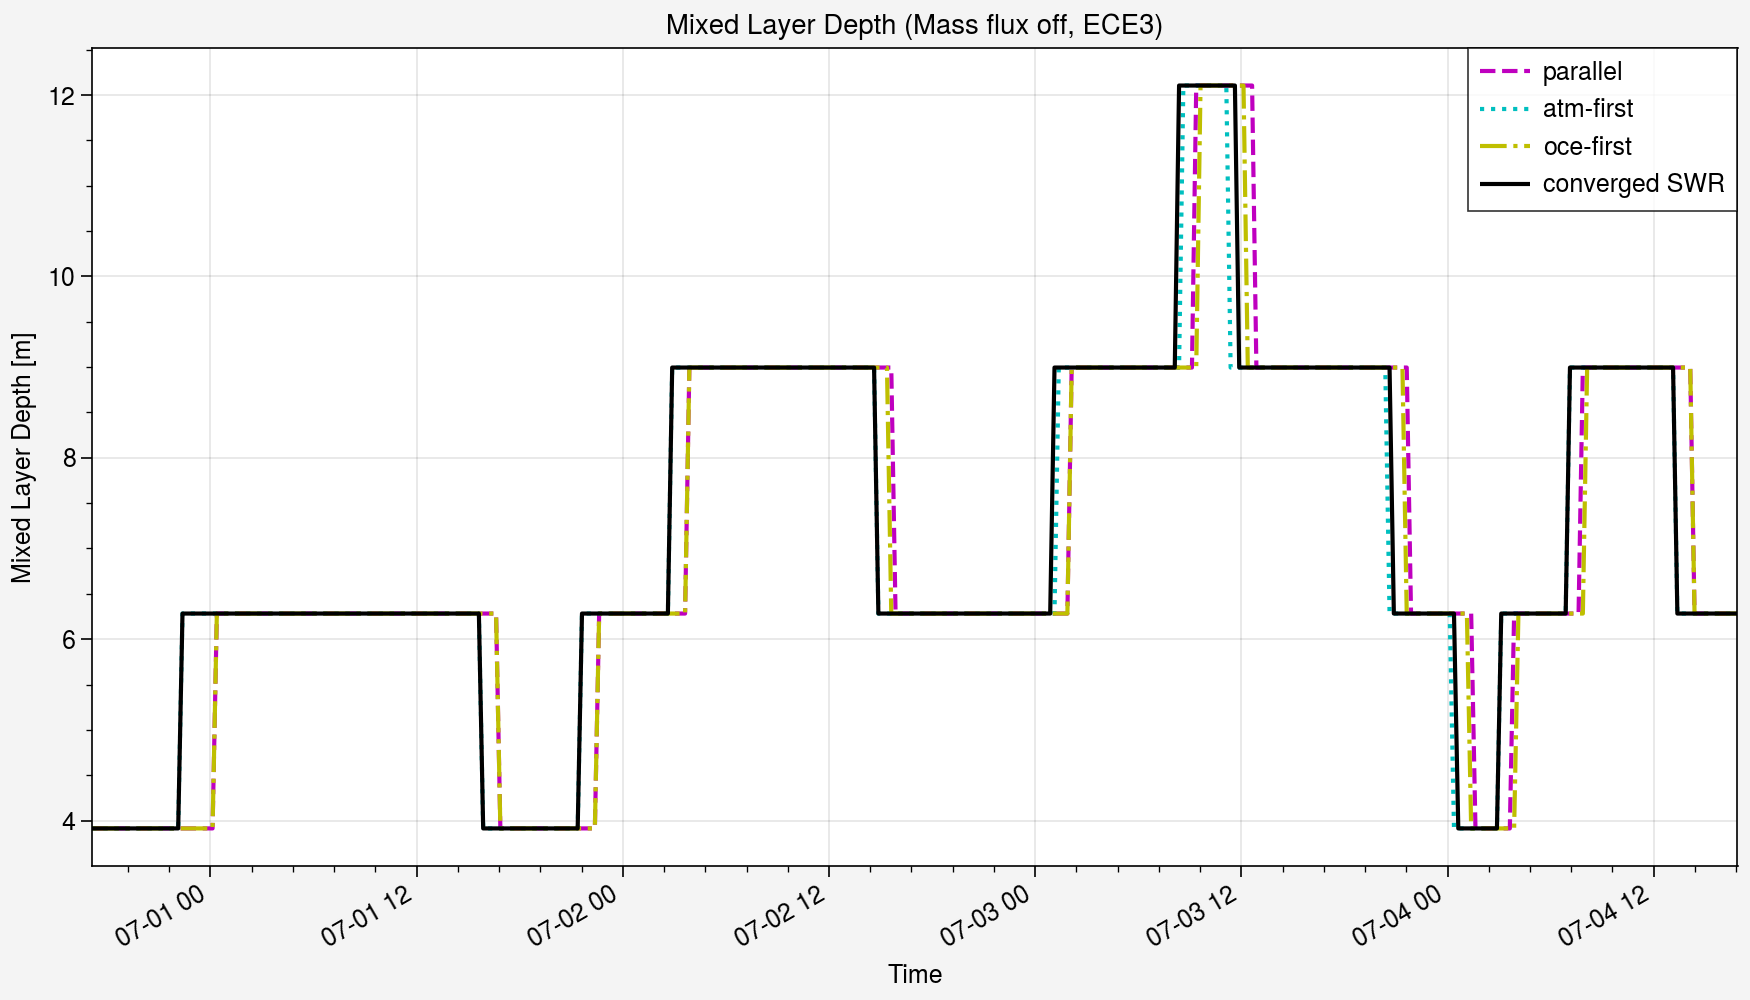

In [33]:
colors = ["m", "c", "y", "k"]
labels = ["parallel", "atm-first", "oce-first", "converged SWR"]
alpha = 1
linestyles = ["--", ":", "-.", "-"]

fig, ax = pplt.subplots(width="70em", height="40em")

for i in range(len(colors)):
    nemo_t_grid = nemo_t_grids_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        nemo_t_grid.somxl010,
        color=color,
        label=label,
        alpha=alpha,
        ls=linestyle,
    )

ax.format(
    ylabel="Mixed Layer Depth [m]",
    xlabel="Time",
    title="Mixed Layer Depth (Mass flux off, ECE3)",
    xrotation=30,
)

ax.legend(ncols=1)
fig.savefig(plotting_output_dir / "ece3_mldepth.pdf")

## Surface Heat Fluxes

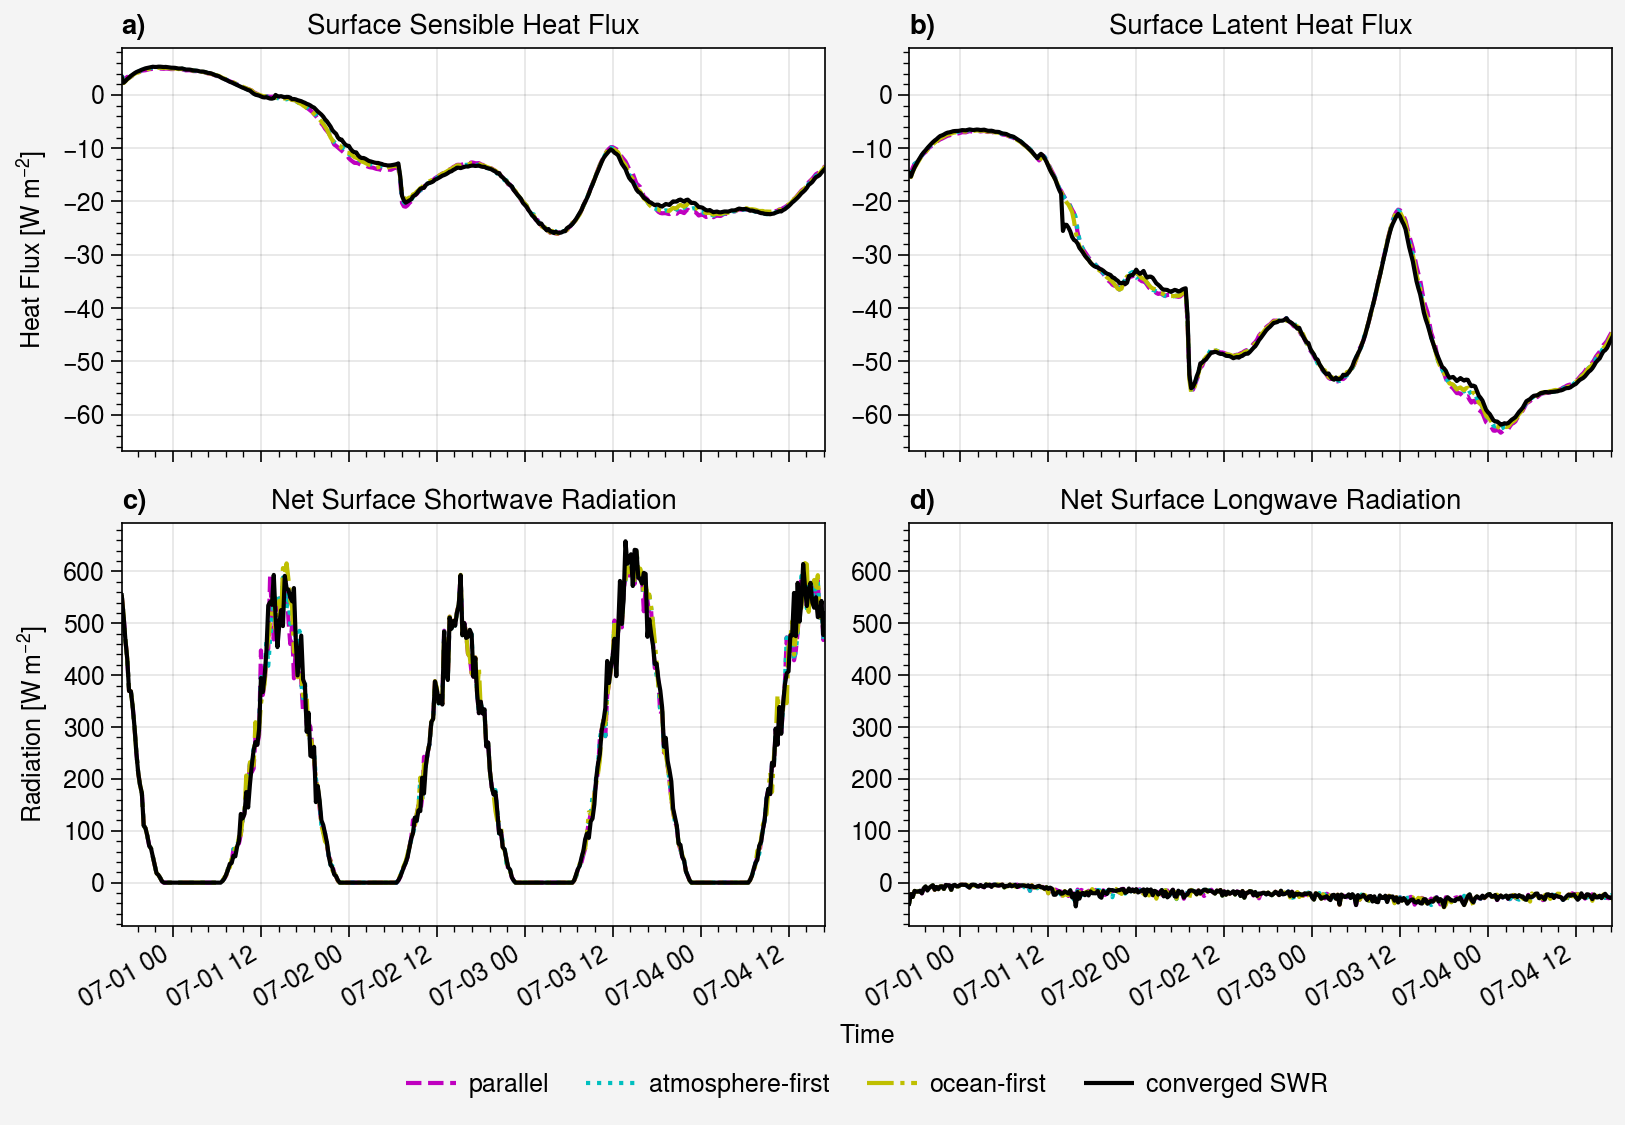

In [34]:
colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
linestyles = ["--", ":", "-.", "-"]

fig, axs = pplt.subplots(
    nrows=2, ncols=2, height="45em", width="65em", sharey=2, spany=False
)

ims = []
ax = axs[0, 0]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    im = ax.plot(
        oifs_diagvar.sfc_sen_flx,
        color=color,
        label=label,
        ls=linestyle,
    )
    ims.append(im)
ax.format(
    ylabel=r"Heat Flux $[W \; m^{-2}]$",
    title="Surface Sensible Heat Flux",
    xlabel="Time",
)

ax = axs[0, 1]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_lat_flx,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Heat Flux $[W \; m^{-2}]$", title="Surface Latent Heat Flux", xlabel="Time"
)

ax = axs[1, 0]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_swrad,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Radiation $[W \; m^{-2}]$",
    title="Net Surface Shortwave Radiation",
    xlabel="Time",
)

ax = axs[1, 1]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_lwrad,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Radiation $[W \; m^{-2}]$",
    title="Net Surface Longwave Radiation",
    xlabel="Time",
)

axs.format(abc="a)", xrotation=30)
fig.legend(ims, frame=False, ncols=4, loc="b")

fig.savefig(plotting_output_dir / "ece3_surface_heat_fluxes.pdf")

## Cloud Cover

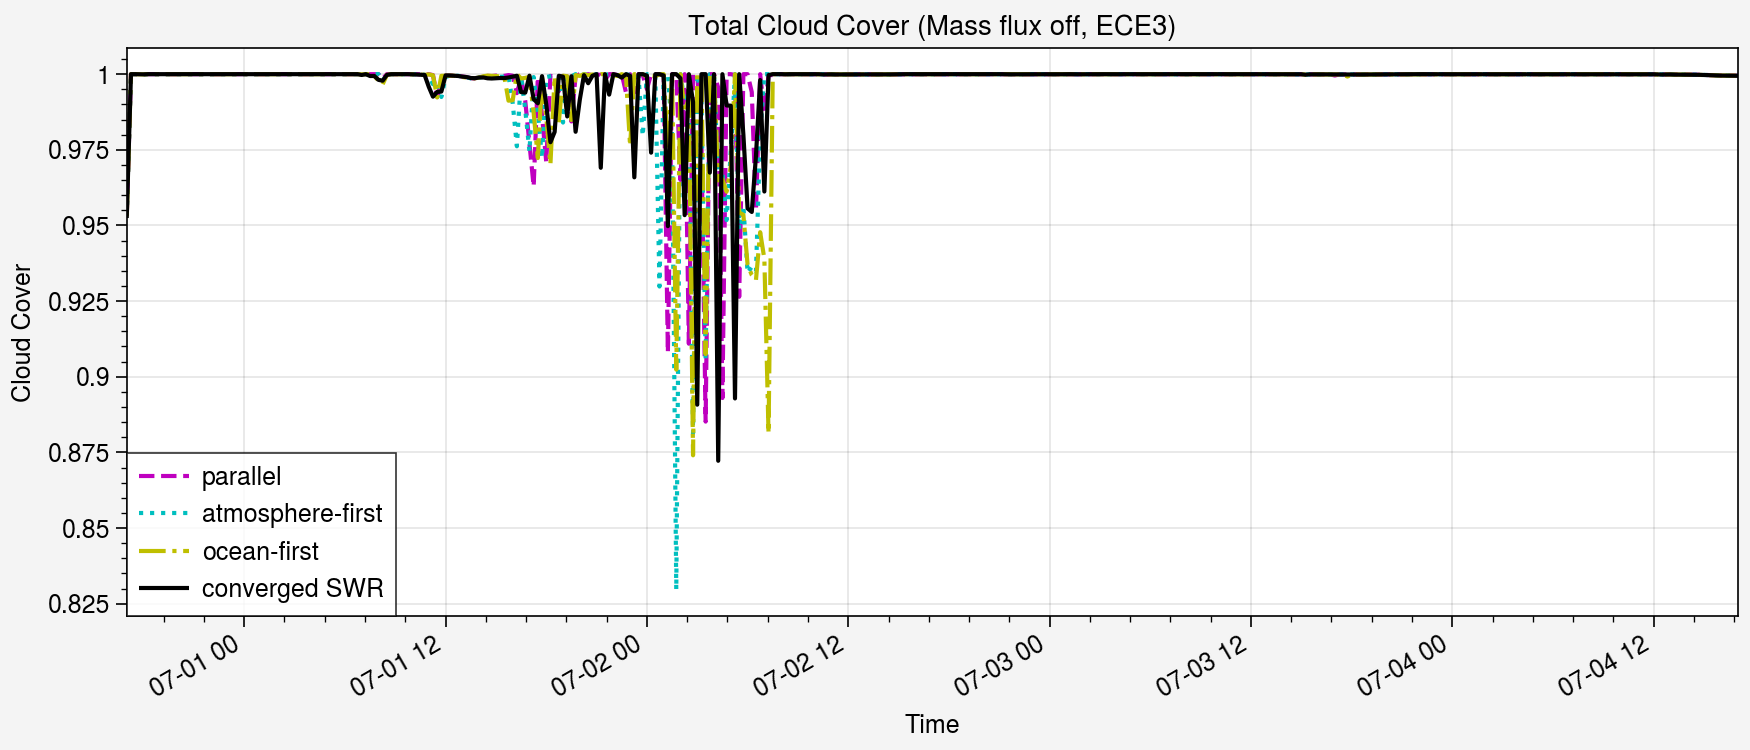

In [35]:
fig, ax = pplt.subplots(width="70em", height="30em")

for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    ax.plot(
        oifs_diagvar.total_cloud,
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
ax.format(
    title="Total Cloud Cover (Mass flux off, ECE3)", xlabel="Time", ylabel="Cloud Cover", xrotation=30,
)
ax.legend(ncols=1)
fig.savefig(plotting_output_dir / "ece3_ccover.pdf")

## Vertical Temperature Profile

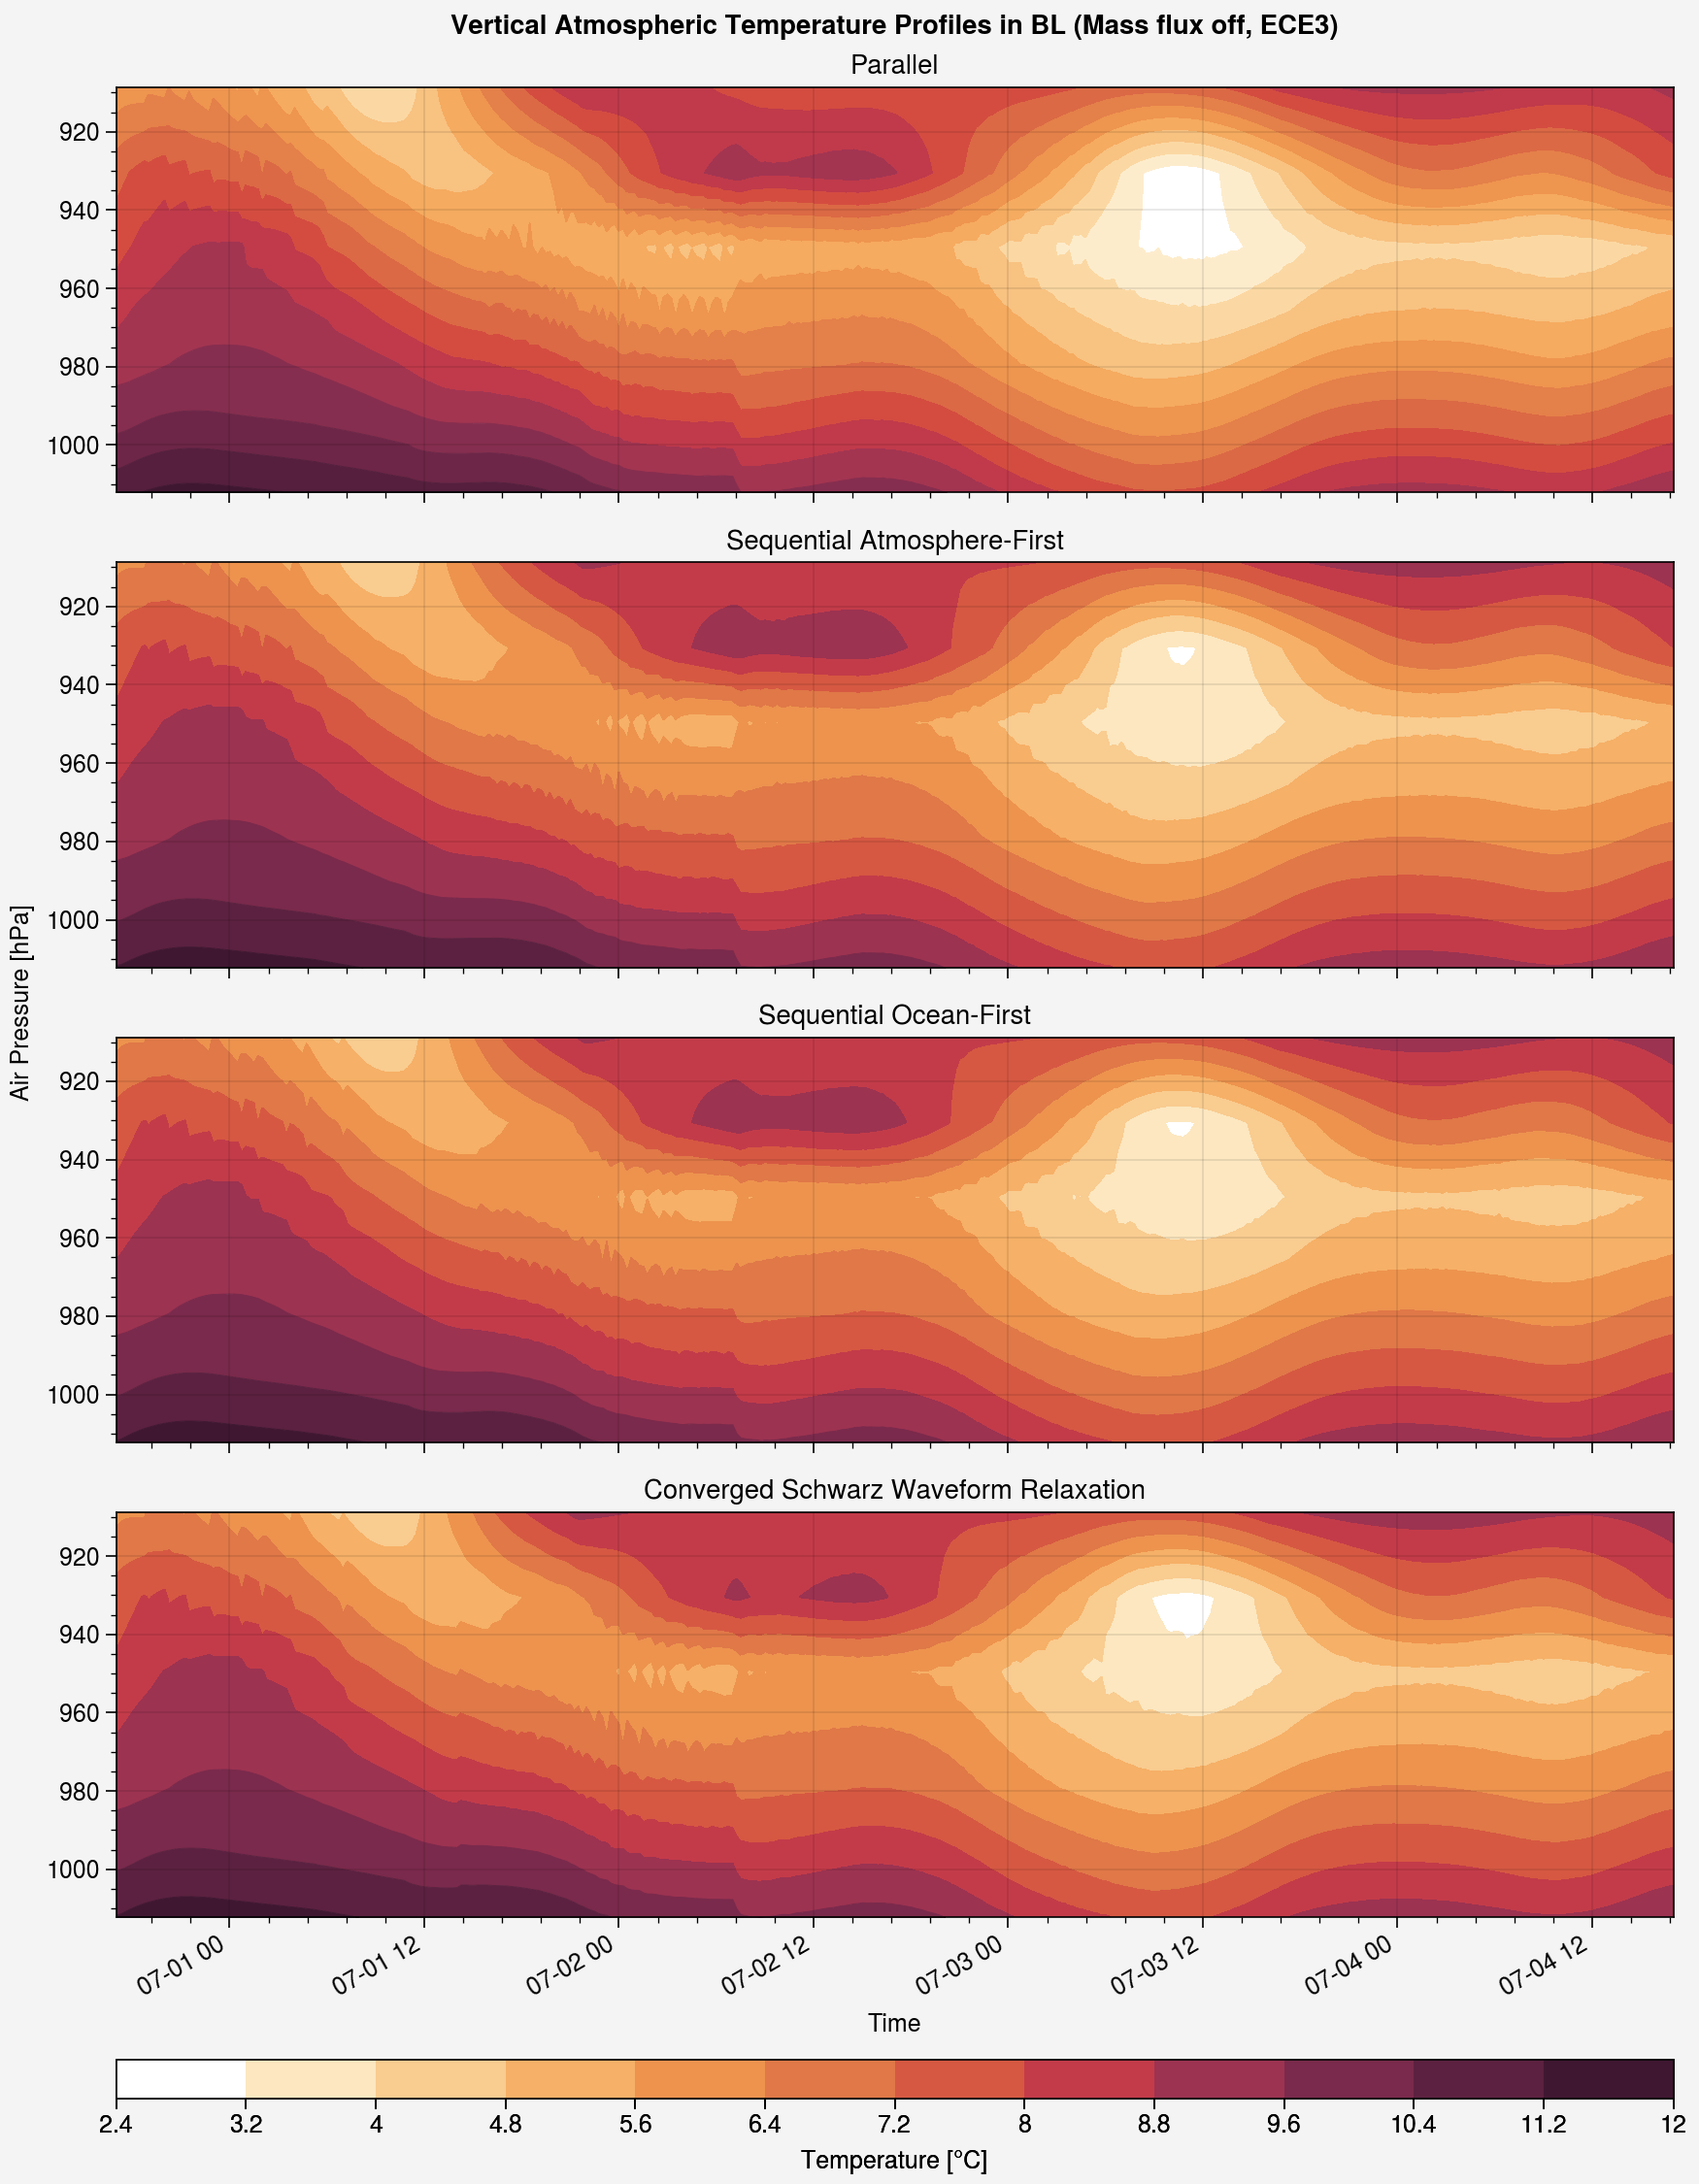

In [36]:
titles = [
    "Parallel",
    "Sequential Atmosphere-First",
    "Sequential Ocean-First",
    "Converged Schwarz Waveform Relaxation",
]

fig, axs = pplt.subplots(nrows=4, ncols=1, height="90em", width="70em")

for i in range(len(colors)):
    ax = axs[i]
    ax_title = titles[i]
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    im = ax.contourf(
        oifs_progvar.t[:, 50:] - 273.15,
        levels=14,
        transpose=True,
        discrete=True,
    )
    ax.format(xlabel="Time", ylabel="Air Pressure [hPa]", title=ax_title, xrotation=30)
    ax.invert_yaxis()
axs.format(
    suptitle="Vertical Atmospheric Temperature Profiles in BL (Mass flux off, ECE3)"
)
fig.colorbar(im, loc="b", title="Temperature [°C]")
fig.savefig(plotting_output_dir / "ece3_air_temperature_profile.pdf")

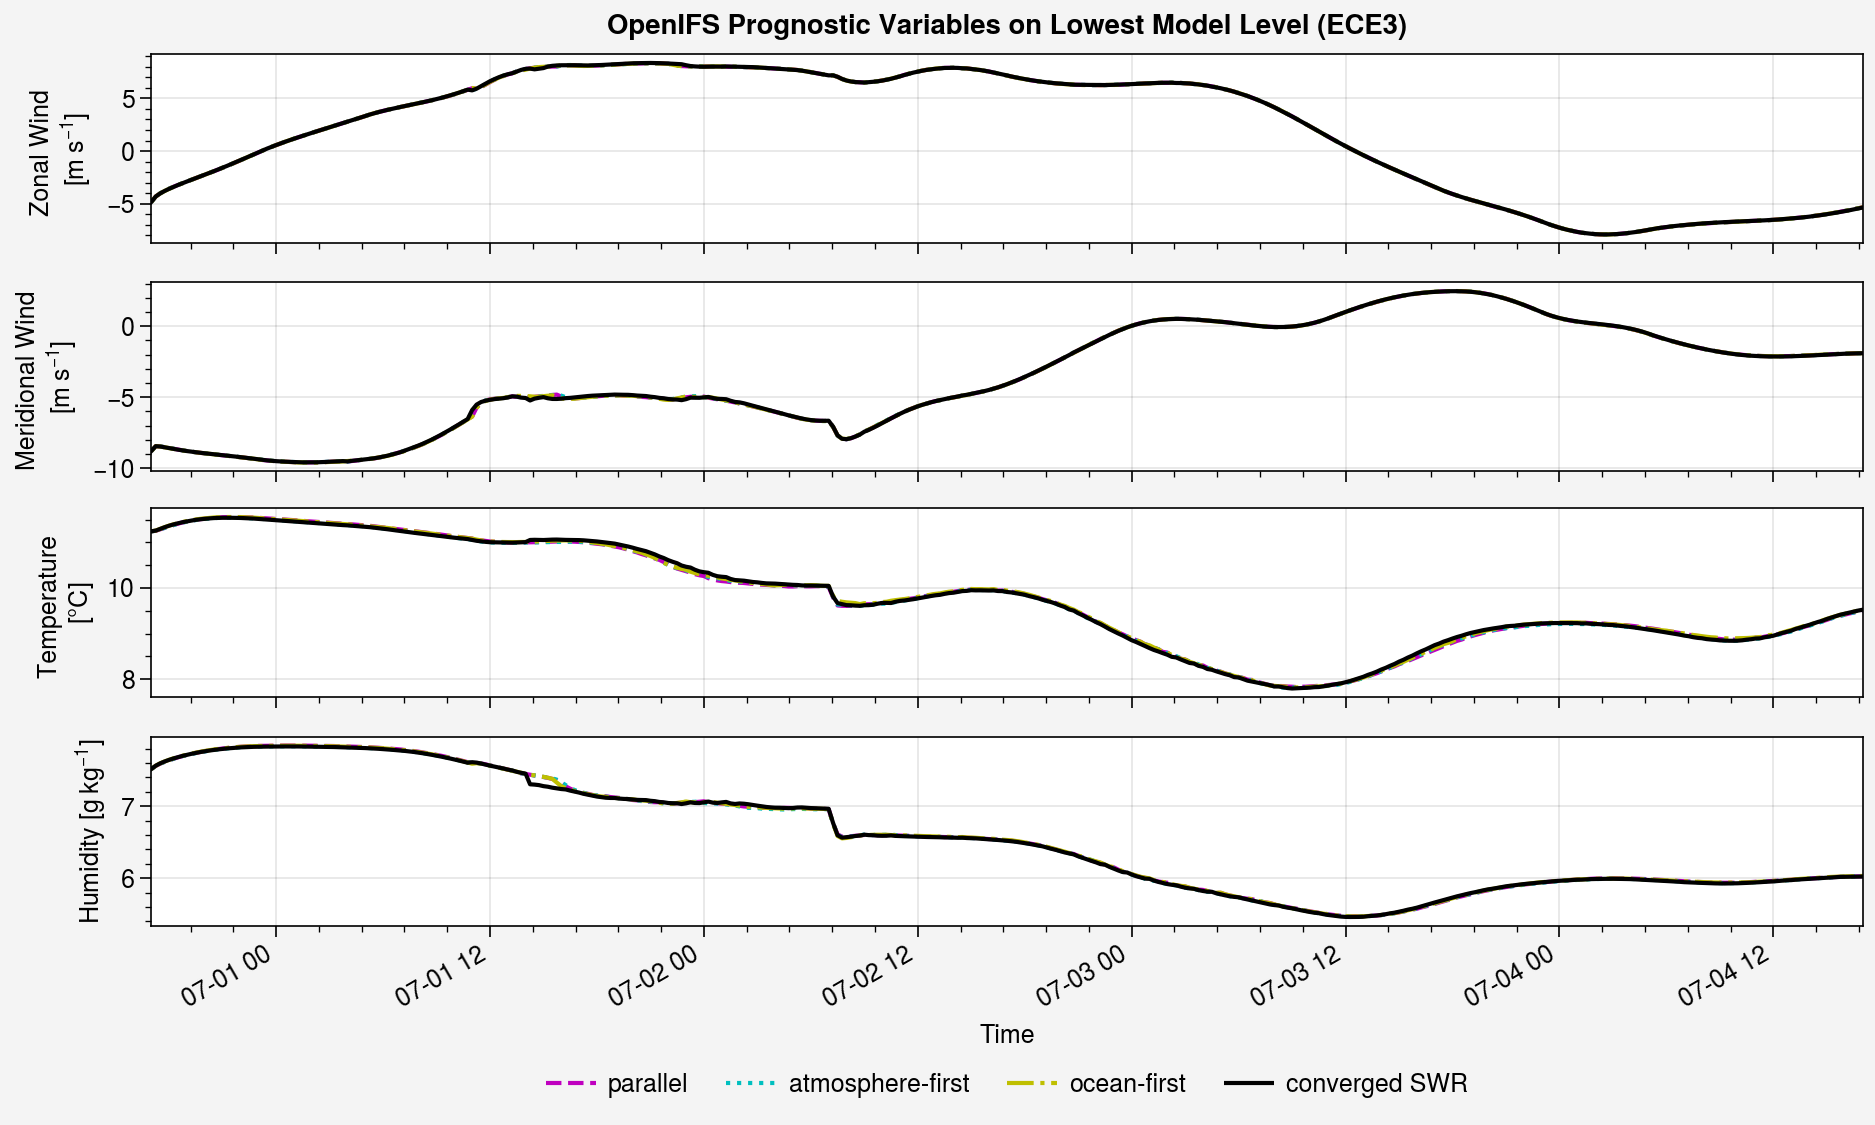

In [37]:
fig, axs = pplt.subplots(nrows=4, spany=False, height="45em", width="75em")

ax = axs[0]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    ax.plot(
        oifs_progvar.u.sel(nlev=60),
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
ax.format(
    ylabel="Zonal Wind \n$[m\; s^{{-1}}]$",
    title="",
    xlabel="Time",
)

ax = axs[1]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    ax.plot(
        oifs_progvar.v.sel(nlev=60),
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
ax.format(
    ylabel=f"Meridional Wind \n$[m\; s^{{-1}}]$",
    title="",
    xlabel="Time",
)

ax = axs[2]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    ax.plot(
        oifs_progvar.t.sel(nlev=60) - 273.15,
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
ax.format(ylabel="Temperature \n$[°C]$", title="", xlabel="Time")

hs = []
ax = axs[3]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    h = ax.plot(
        oifs_progvar.q.sel(nlev=60) * 1e3,
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
    hs.append(h)
ax.format(
    ylabel="Humidity $[g\; kg^{{-1}}]$",
    title="",
    xlabel="Time",
    xrotation=30,
)

axs.format(suptitle="OpenIFS Prognostic Variables on Lowest Model Level (ECE3)")

fig.legend(hs, ncols=4, frame=False, loc="b")
fig.savefig(plotting_output_dir / "ece3_progvars_oifs.pdf")

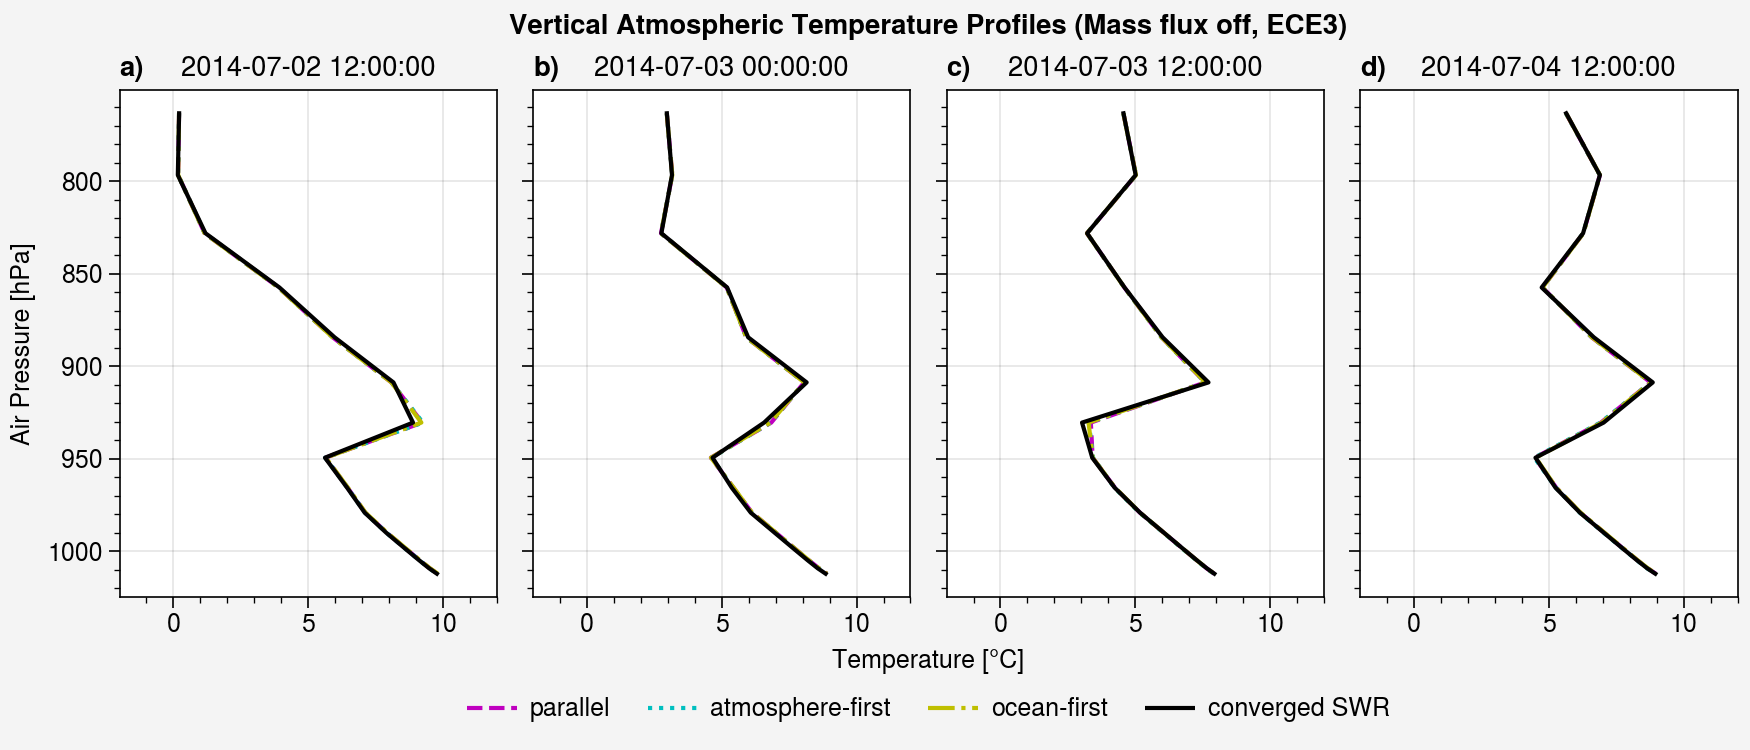

In [38]:
fig, axs = pplt.subplots(nrows=1, ncols=4, width="70em", height="30em")
axs.format(suptitle="Vertical Atmospheric Temperature Profiles (Mass flux off, ECE3)")
axs.format(abc="a)")
timestamps = [
    pd.Timestamp("2014-07-02 12:00"),
    pd.Timestamp("2014-07-03 00:00"),
    pd.Timestamp("2014-07-03 12:00"),
    pd.Timestamp("2014-07-04 12:00"),
]

ax = axs[0]
ims = []
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[0]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    im = ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ims.append(im)
    ax.format(title=timestamp)

ax = axs[1]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[1]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[2]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[2]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[3]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[3]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)


for ax in axs:
    ax.format(
        xlabel="Temperature [°C]",
        ylabel="Air Pressure [hPa]",
        yreverse=True,
        xlim=[-2, 12],
    )

fig.legend(ims, frame=False, ncols=4, loc="b")
fig.savefig(plotting_output_dir / "ece3_air_temperature_stratification.pdf")

## NEMO Prognostic Variables

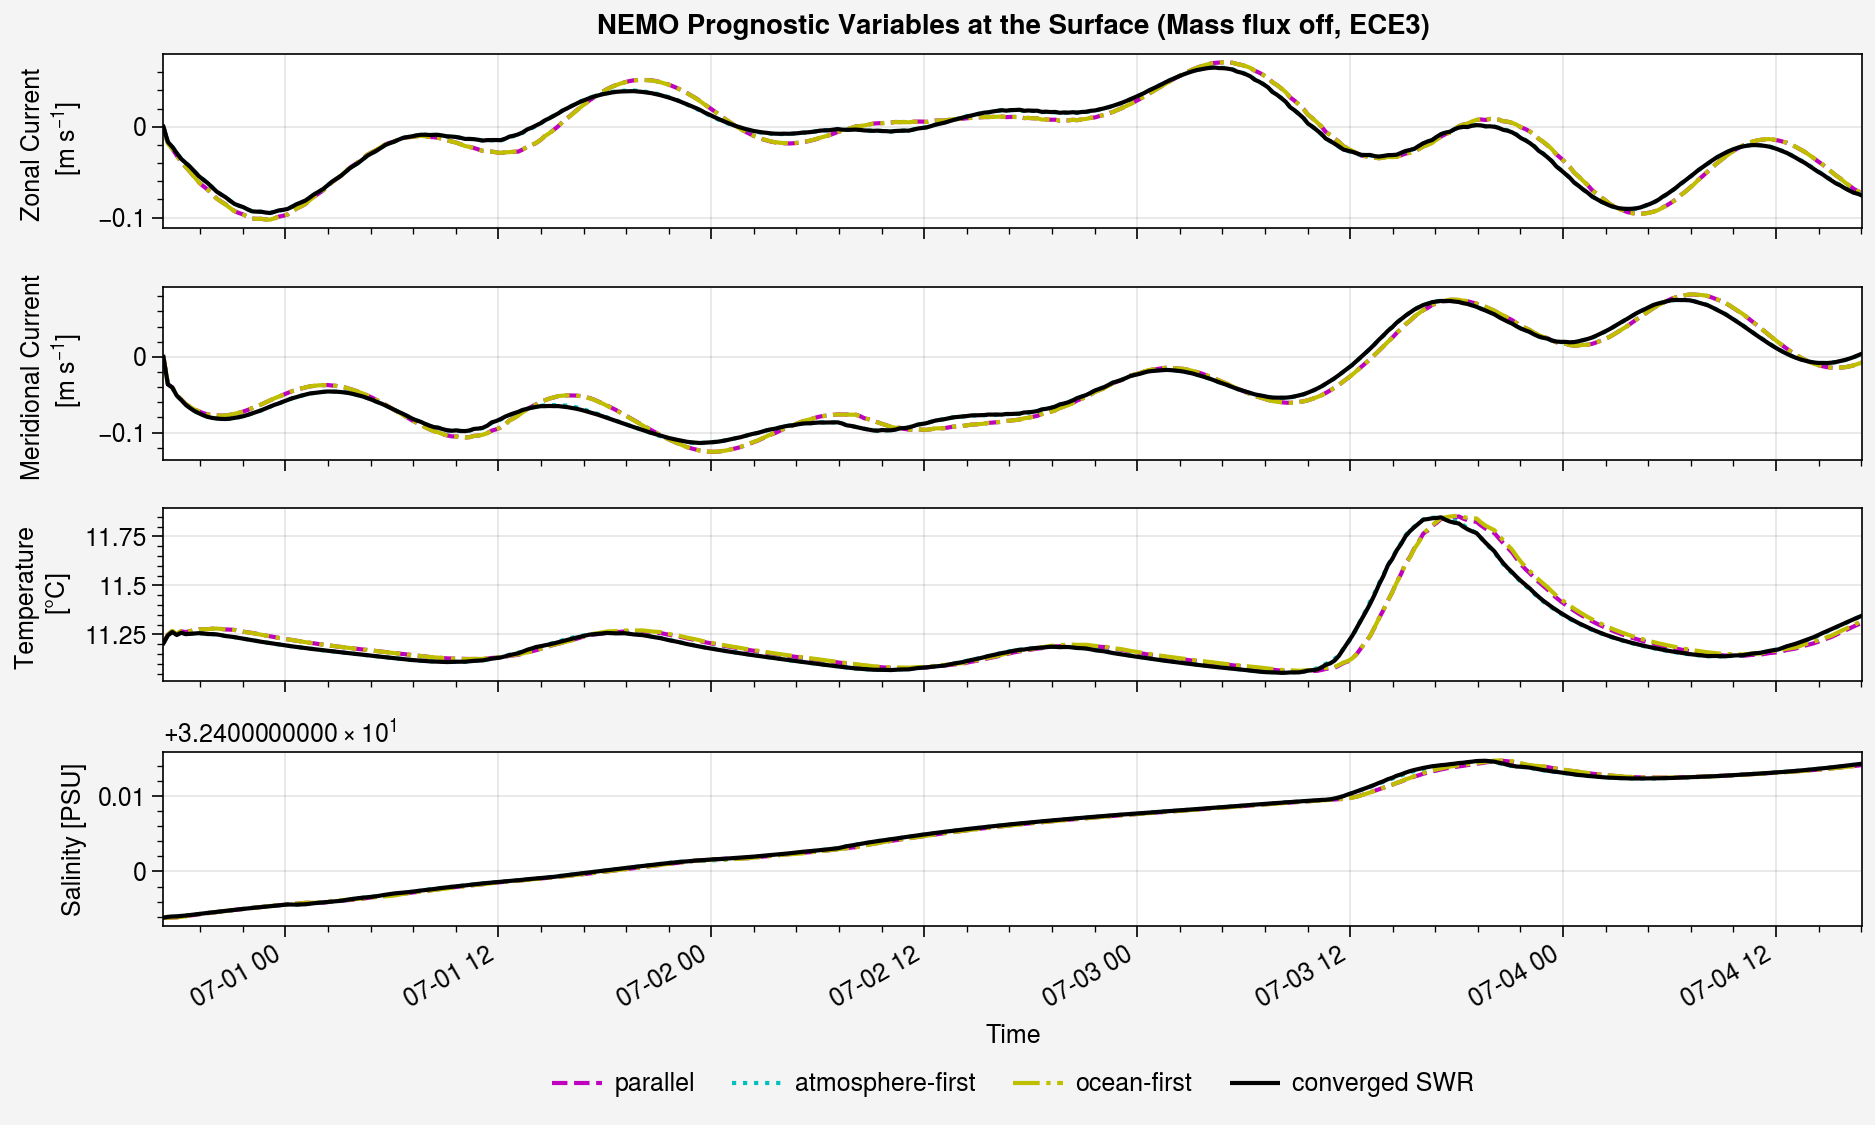

In [39]:
fig, axs = pplt.subplots(nrows=4, spany=False, height="45em", width="75em")

ax = axs[0]
for i in range(len(colors)):
    nemo_u = nemo_u_grids_3[i]
    ax.plot(
        nemo_u.vozocrtx.isel(depthu=0),
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
ax.format(
    ylabel=f"Zonal Current \n $[m\; s^{{-1}}]$",
    title="",
    xlabel="Time",
)

ax = axs[1]
for i in range(len(colors)):
    nemo_v = nemo_v_grids_3[i]
    ax.plot(
        nemo_v.vomecrty.isel(depthv=0),
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
ax.format(
    ylabel=f"Meridional Current \n $[m\; s^{{-1}}]$",
    title="",
    xlabel="Time",
)

ax = axs[2]
for i in range(len(colors)):
    nemo_t = nemo_t_grids_3[i]
    ax.plot(
        nemo_t.sosstsst,
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
ax.format(ylabel=f"Temperature \n$[°C]$", title="", xlabel="Time")

hs = []
ax = axs[3]
for i in range(len(colors)):
    nemo_t = nemo_t_grids_3[i]
    h = ax.plot(
        nemo_t.vosaline.isel(deptht=0),
        color=colors[i],
        label=labels[i],
        alpha=alpha,
        ls=linestyles[i],
    )
    hs.append(h)
ax.format(ylabel="Salinity [PSU]", title="", xlabel="Time")

axs.format(xrotation=30)
axs.format(suptitle="NEMO Prognostic Variables at the Surface (Mass flux off, ECE3)")

fig.legend(hs, ncols=4, frame=False, loc="b")
fig.savefig(plotting_output_dir / "ece3_progvars_nemo.pdf")

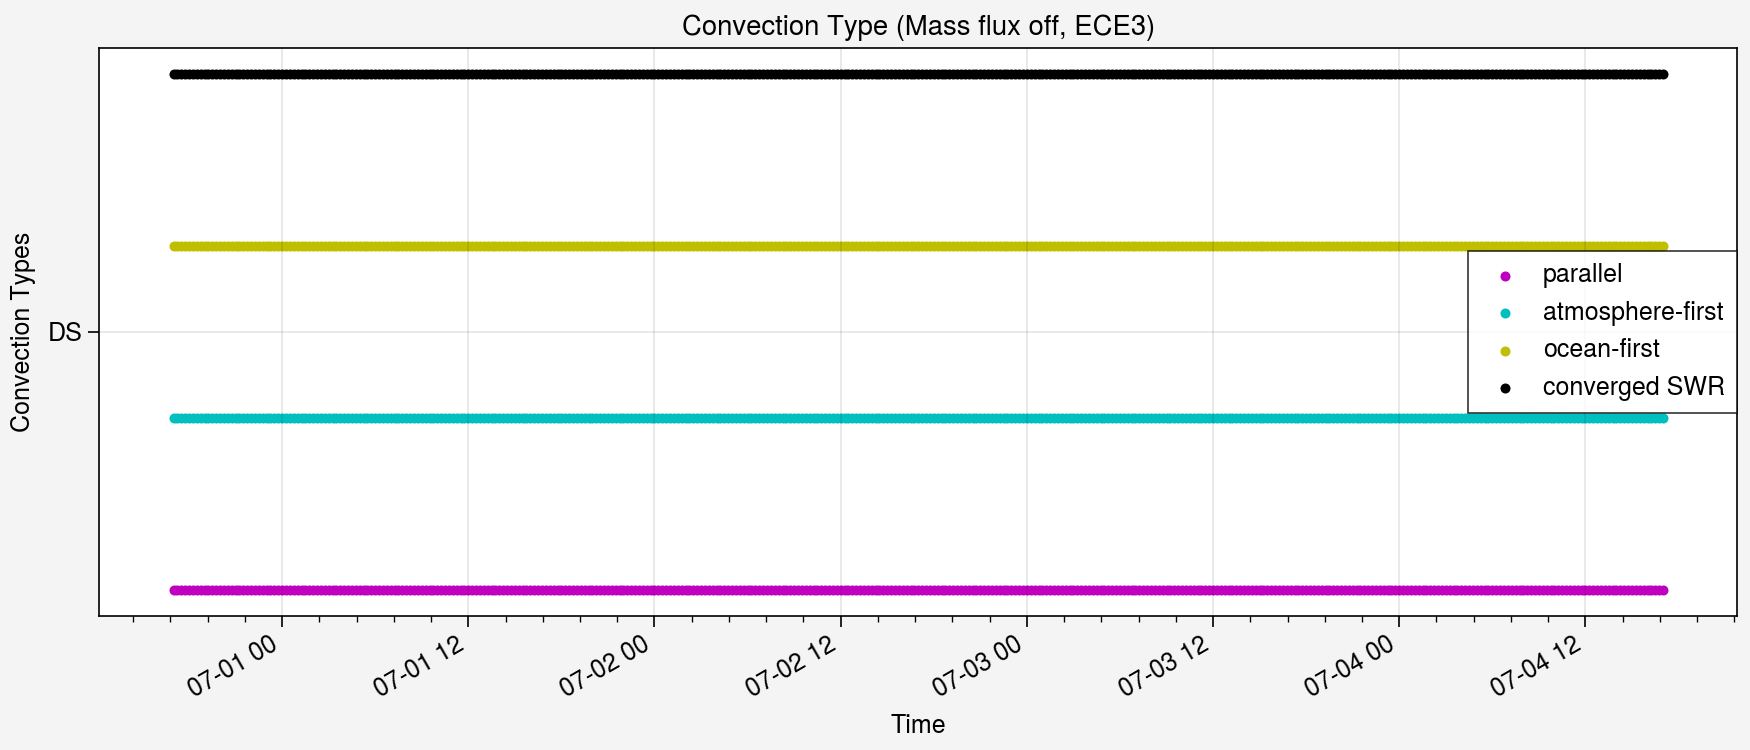

In [40]:
fig, ax = pplt.subplots(width="70em", height="30em")

colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
shifts = [-0.12, -0.04, 0.04, 0.12]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    shift = shifts[i]
    ax.scatter(
        oifs_diagvar.conv_type + shift,
        color=color,
        label=label,
        marker=".",
    )
ax.format(
    title="Convection Type (Mass flux off, ECE3)",
    ylabel="Convection Types",
    yticks=[0, 1, 2, 3],
    yticklabels=["DS", "DC", "Sc", "Cu"],
    ytickminor=False,
    xrotation=30,
    xlabel="Time",
)
ax.legend(ncol=1)

fig.savefig(plotting_output_dir / "ece3_conv_types.pdf")